# 生存フラグと特徴量のクロス集計

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from titanic_package.titanic_plot import plot_survival_rate
from titanic_package.titanic_preprocess import is_age_estimated

In [2]:
# Data load
titanic_train = pd.read_csv('./data/train.csv')
titanic_test = pd.read_csv('./data/test.csv')

In [3]:
# 学習/評価データをマージ
titanic_train['Type'] = 'train'
titanic_test['Type'] = 'test'
titanic_test['Survived'] = np.NaN

titanic_all = pd.concat([titanic_train, titanic_test], ignore_index=True, sort=True)
train_flg = titanic_all['Type'] == 'train'
test_flg = titanic_all['Type'] == 'test'

In [4]:
# Pclass（1-3）を1st-3rdに変換
pclass_name_list = ['', '1st', '2nd', '3rd']
titanic_all['Pclass_name'] = titanic_all['Pclass'].apply(lambda x : pclass_name_list[x])

# Passenger class
* 1st(63.3%) > 2nd(47.3%) > 3rd(24.2%)の順に生存率が高い

0       3rd
1       1st
2       3rd
3       1st
4       3rd
       ... 
1304    3rd
1305    1st
1306    3rd
1307    3rd
1308    3rd
Name: Pclass_name, Length: 1309, dtype: object
0       3rd
1       1st
2       3rd
3       1st
4       3rd
       ... 
1304    3rd
1305    1st
1306    3rd
1307    3rd
1308    3rd
Name: Pclass_name, Length: 1309, dtype: object
0        True
1        True
2        True
3        True
4        True
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: Type, Length: 1309, dtype: bool
0      3rd
1      1st
2      3rd
3      1st
4      3rd
      ... 
886    2nd
887    1st
888    3rd
889    1st
890    3rd
Name: Pclass_name, Length: 891, dtype: object
            Survived  count
Pclass_name                
1st            63.0%    216
2nd            47.3%    184
3rd            24.2%    491


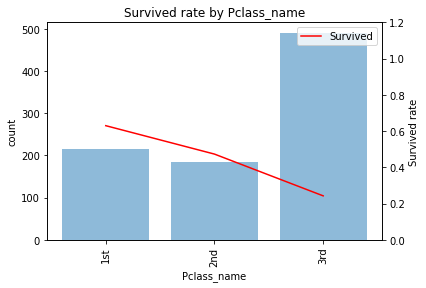

In [5]:
feature = 'Pclass_name'
plot_survival_rate(feature, titanic_all)

# 性別
* 女性(74.2%)の方が男性(18.9%)より高い

       Survived  count
Sex                   
female    74.2%    314
male      18.9%    577


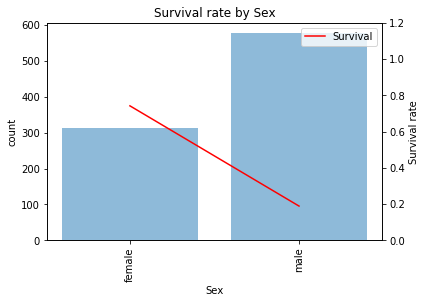

In [6]:
feature = 'Sex'
plot_survival_rate(feature, titanic_all)

# 年齢
## 5才刻み
* 0-5才は70.5%と生存率が高い
* 5-10才は35.0%と平均並だが10-15才は57.9%と高い
  * 0-15才は詳細を確認する
* 15-60才は34-41%で平均(38%)とそれほど変わらない
* 60-65才で28.6%, 65才以上で12.5%と生存率が低い
  * 60才以上は「高齢者」としてまとめる
* 欠損値も29.4%と低い

## 0-15才
* 5才以下: Pclassや性別に関わらず生存するケースが多い。死者の大半は3rdで2nd以上だと1人以外生存
* 5-10才: Pclassで生存かどうかがほぼ分かれている。生存者の大半は2ndで死者の大半は3rd
* 10-15才: 2nd以上だと生存。3rdでも42.9%が生存。

         Survived  count
Age                     
00_0-5      70.5%     44
01_5-10     35.0%     20
02_10-15    57.9%     19
03_15-20    34.4%     96
04_20-25    34.4%    122
05_25-30    38.9%    108
06_30-35    46.6%     88
07_35-40    41.8%     67
08_40-45    36.2%     47
09_45-50    41.0%     39
10_50-55    41.7%     24
11_55-60    38.9%     18
12_60-65    28.6%     14
13_65-99    12.5%      8
nan         29.4%    177


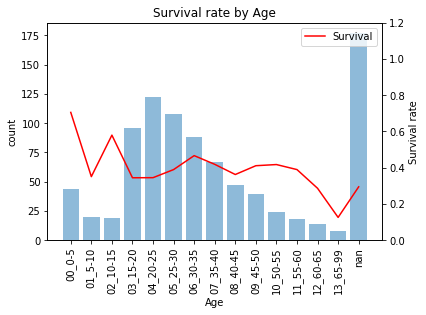

In [7]:
feature = 'Age'

# 5才刻み
age_ctgr_list = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 99]
plot_survival_rate(feature, titanic_all, bins=age_ctgr_list)

In [8]:
# (0, 5]才(生存)
f = (titanic_all['Age'] > 0) & (titanic_all['Age'] <= 5) & (titanic_all['Survived'] == 1)
titanic_all[f]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Type,Pclass_name
10,4.00,G6,S,16.7000,"Sandstrom, Miss. Marguerite Rut",1,11,3,female,1,1.0,PP 9549,train,3rd
43,3.00,NaN,C,41.5792,"Laroche, Miss. Simonne Marie Anne Andree",2,44,2,female,1,1.0,SC/Paris 2123,train,2nd
58,5.00,NaN,S,27.7500,"West, Miss. Constance Mirium",2,59,2,female,1,1.0,C.A. 34651,train,2nd
78,0.83,NaN,S,29.0000,"Caldwell, Master. Alden Gates",2,79,2,male,0,1.0,248738,train,2nd
172,1.00,NaN,S,11.1333,"Johnson, Miss. Eleanor Ileen",1,173,3,female,1,1.0,347742,train,3rd
183,1.00,F4,S,39.0000,"Becker, Master. Richard F",1,184,2,male,2,1.0,230136,train,2nd
184,4.00,NaN,S,22.0250,"Kink-Heilmann, Miss. Luise Gretchen",2,185,3,female,0,1.0,315153,train,3rd
193,3.00,F2,S,26.0000,"Navratil, Master. Michel M",1,194,2,male,1,1.0,230080,train,2nd
233,5.00,NaN,S,31.3875,"Asplund, Miss. Lillian Gertrud",2,234,3,female,4,1.0,347077,train,3rd
261,3.00,NaN,S,31.3875,"Asplund, Master. Edvin Rojj Felix",2,262,3,male,4,1.0,347077,train,3rd


In [9]:
# (0, 5]才(死亡)
f = (titanic_all['Age'] > 0) & (titanic_all['Age'] <= 5) & (titanic_all['Survived'] == 0)
titanic_all[f]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Type,Pclass_name
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,train,3rd
16,2.0,NaN,Q,29.1250,"Rice, Master. Eugene",1,17,3,male,4,0.0,382652,train,3rd
63,4.0,NaN,S,27.9000,"Skoog, Master. Harald",2,64,3,male,3,0.0,347088,train,3rd
119,2.0,NaN,S,31.2750,"Andersson, Miss. Ellis Anna Maria",2,120,3,female,4,0.0,347082,train,3rd
164,1.0,NaN,S,39.6875,"Panula, Master. Eino Viljami",1,165,3,male,4,0.0,3101295,train,3rd
171,4.0,NaN,Q,29.1250,"Rice, Master. Arthur",1,172,3,male,4,0.0,382652,train,3rd
205,2.0,G6,S,10.4625,"Strom, Miss. Telma Matilda",1,206,3,female,0,0.0,347054,train,3rd
297,2.0,C22 C26,S,151.5500,"Allison, Miss. Helen Loraine",2,298,1,female,1,0.0,113781,train,1st
374,3.0,NaN,S,21.0750,"Palsson, Miss. Stina Viola",1,375,3,female,3,0.0,349909,train,3rd
386,1.0,NaN,S,46.9000,"Goodwin, Master. Sidney Leonard",2,387,3,male,5,0.0,CA 2144,train,3rd


In [10]:
# (5, 10]才(生存)
f = (titanic_all['Age'] > 5) & (titanic_all['Age'] <= 10) & (titanic_all['Survived'] == 1)
titanic_all[f]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Type,Pclass_name
165,9.0,NaN,S,20.525,"Goldsmith, Master. Frank John William ""Frankie""",2,166,3,male,0,1.0,363291,train,3rd
237,8.0,NaN,S,26.250,"Collyer, Miss. Marjorie ""Lottie""",2,238,2,female,0,1.0,C.A. 31921,train,2nd
489,9.0,NaN,S,15.900,"Coutts, Master. Eden Leslie ""Neville""",1,490,3,male,1,1.0,C.A. 37671,train,3rd
535,7.0,NaN,S,26.250,"Hart, Miss. Eva Miriam",2,536,2,female,0,1.0,F.C.C. 13529,train,2nd
549,8.0,NaN,S,36.750,"Davies, Master. John Morgan Jr",1,550,2,male,1,1.0,C.A. 33112,train,2nd
720,6.0,NaN,S,33.000,"Harper, Miss. Annie Jessie ""Nina""",1,721,2,female,0,1.0,248727,train,2nd
751,6.0,E121,S,12.475,"Moor, Master. Meier",1,752,3,male,0,1.0,392096,train,3rd


In [11]:
# (5, 10]才(死亡)
f = (titanic_all['Age'] > 5) & (titanic_all['Age'] <= 10) & (titanic_all['Survived'] == 0)
titanic_all[f]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Type,Pclass_name
24,8.0,NaN,S,21.0750,"Palsson, Miss. Torborg Danira",1,25,3,female,3,0.0,349909,train,3rd
50,7.0,NaN,S,39.6875,"Panula, Master. Juha Niilo",1,51,3,male,4,0.0,3101295,train,3rd
147,9.0,NaN,S,34.3750,"Ford, Miss. Robina Maggie ""Ruby""",2,148,3,female,2,0.0,W./C. 6608,train,3rd
182,9.0,NaN,S,31.3875,"Asplund, Master. Clarence Gustaf Hugo",2,183,3,male,4,0.0,347077,train,3rd
278,7.0,NaN,Q,29.1250,"Rice, Master. Eric",1,279,3,male,4,0.0,382652,train,3rd
419,10.0,NaN,S,24.1500,"Van Impe, Miss. Catharina",2,420,3,female,0,0.0,345773,train,3rd
480,9.0,NaN,S,46.9000,"Goodwin, Master. Harold Victor",2,481,3,male,5,0.0,CA 2144,train,3rd
541,9.0,NaN,S,31.2750,"Andersson, Miss. Ingeborg Constanzia",2,542,3,female,4,0.0,347082,train,3rd
634,9.0,NaN,S,27.9000,"Skoog, Miss. Mabel",2,635,3,female,3,0.0,347088,train,3rd
787,8.0,NaN,Q,29.1250,"Rice, Master. George Hugh",1,788,3,male,4,0.0,382652,train,3rd


In [12]:
# (10, 15]才(生存)
f = (titanic_all['Age'] > 10) & (titanic_all['Age'] <= 15) & (titanic_all['Survived'] == 1)
titanic_all[f]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Type,Pclass_name
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,train,2nd
22,15.0,NaN,Q,8.0292,"McGowan, Miss. Anna ""Annie""",0,23,3,female,0,1.0,330923,train,3rd
39,14.0,NaN,C,11.2417,"Nicola-Yarred, Miss. Jamila",0,40,3,female,1,1.0,2651,train,3rd
125,12.0,NaN,C,11.2417,"Nicola-Yarred, Master. Elias",0,126,3,male,1,1.0,2651,train,3rd
435,14.0,B96 B98,S,120.0000,"Carter, Miss. Lucile Polk",2,436,1,female,1,1.0,113760,train,1st
446,13.0,NaN,S,19.5000,"Mellinger, Miss. Madeleine Violet",1,447,2,female,0,1.0,250644,train,2nd
689,15.0,B5,S,211.3375,"Madill, Miss. Georgette Alexandra",1,690,1,female,0,1.0,24160,train,1st
780,13.0,NaN,C,7.2292,"Ayoub, Miss. Banoura",0,781,3,female,0,1.0,2687,train,3rd
802,11.0,B96 B98,S,120.0000,"Carter, Master. William Thornton II",2,803,1,male,1,1.0,113760,train,1st
830,15.0,NaN,C,14.4542,"Yasbeck, Mrs. Antoni (Selini Alexander)",0,831,3,female,1,1.0,2659,train,3rd


In [13]:
# (10, 15]才(死亡)
f = (titanic_all['Age'] > 10) & (titanic_all['Age'] <= 15) & (titanic_all['Survived'] == 0)
titanic_all[f]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Type,Pclass_name
14,14.0,NaN,S,7.8542,"Vestrom, Miss. Hulda Amanda Adolfina",0,15,3,female,0,0.0,350406,train,3rd
59,11.0,NaN,S,46.9000,"Goodwin, Master. William Frederick",2,60,3,male,5,0.0,CA 2144,train,3rd
111,14.5,NaN,C,14.4542,"Zabour, Miss. Hileni",0,112,3,female,1,0.0,2665,train,3rd
352,15.0,NaN,C,7.2292,"Elias, Mr. Tannous",1,353,3,male,1,0.0,2695,train,3rd
542,11.0,NaN,S,31.2750,"Andersson, Miss. Sigrid Elisabeth",2,543,3,female,4,0.0,347082,train,3rd
683,14.0,NaN,S,46.9000,"Goodwin, Mr. Charles Edward",2,684,3,male,5,0.0,CA 2144,train,3rd
686,14.0,NaN,S,39.6875,"Panula, Mr. Jaako Arnold",1,687,3,male,4,0.0,3101295,train,3rd
731,11.0,NaN,C,18.7875,"Hassan, Mr. Houssein G N",0,732,3,male,0,0.0,2699,train,3rd


# 年齢 x PassengerClass
* 0-5才: クラスに関わらず生存率が高い
* 5-10才: 2ndは4人全員が生存。3rdは16人中3人生存(18.8%)と低い
* 10-15才: 2nd以上は5人全員が生存。3rdは14人中6人生存(42.9%)と平均より高い

            Survived  count
Pclass_name                
1st            66.7%      3
2nd           100.0%     13
3rd            57.1%     28


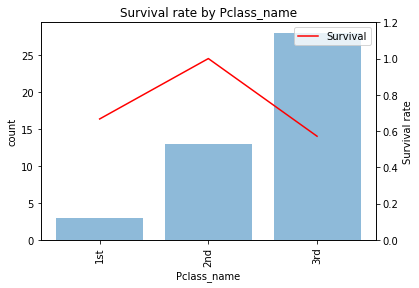

In [14]:
feature = 'Pclass_name'

f = (titanic_all['Age'] > 0) & (titanic_all['Age'] <= 5)
titanic_age = titanic_all[f].reset_index(drop=True)

plot_survival_rate(feature, titanic_age)

            Survived  count
Pclass_name                
2nd           100.0%      4
3rd            18.8%     16


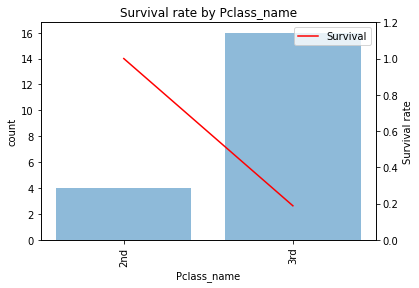

In [15]:
f = (titanic_all['Age'] > 5) & (titanic_all['Age'] <= 10)
titanic_age = titanic_all[f].reset_index(drop=True)

plot_survival_rate(feature, titanic_age)

            Survived  count
Pclass_name                
1st           100.0%      3
2nd           100.0%      2
3rd            42.9%     14


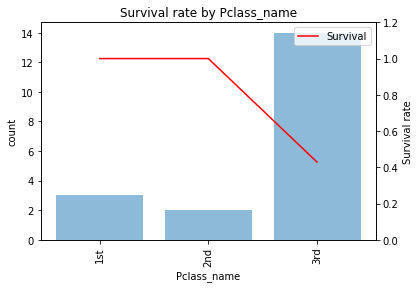

In [16]:
f = (titanic_all['Age'] > 10) & (titanic_all['Age'] <= 15)
titanic_age = titanic_all[f].reset_index(drop=True)

plot_survival_rate(feature, titanic_age)

# 年齢推定フラグ
* 年齢が推定された人の生存率は5.6%と低い

In [17]:
titanic_all['IsAgeEstimated'] = titanic_all['Age'].apply(lambda age: 1 if is_age_estimated(age) else 0)

               Survived  count
IsAgeEstimated                
0                 39.1%    873
1                  5.6%     18


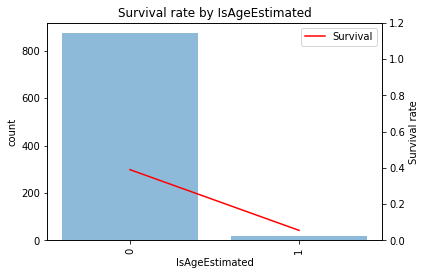

In [18]:
feature = 'IsAgeEstimated'
plot_survival_rate(feature, titanic_all)

# 一緒に乗船した兄弟、配偶者の数(SibSp)
* 0(34.5%)から1(53.6%)と増え、それ以降は単調に減少
  * 0をフラグ化する
* サンプル数が少ないので4以上はまとめる

      Survived  count
SibSp                
0        34.5%    608
1        53.6%    209
2        46.4%     28
3        25.0%     16
4        16.7%     18
5         0.0%      5
8         0.0%      7


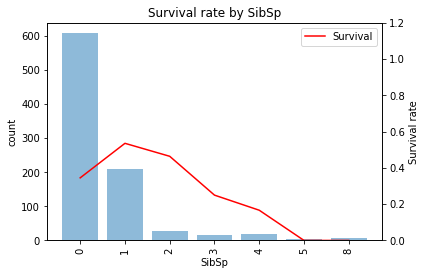

In [19]:
feature = 'SibSp'
plot_survival_rate(feature, titanic_all)

In [20]:
# 4以上は4に丸める
titanic_all['SibSp_rounded'] = titanic_all['SibSp'].apply(lambda x: min(4, x))

              Survived  count
SibSp_rounded                
0                34.5%    608
1                53.6%    209
2                46.4%     28
3                25.0%     16
4                10.0%     30


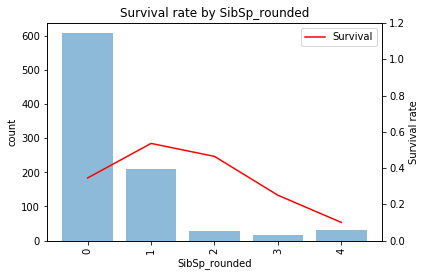

In [21]:
feature = 'SibSp_rounded'
plot_survival_rate(feature, titanic_all)

# 一緒に乗船した親子の数(Parch)
* サンプル数が少ないので3以上はまとめる
* 0(34.4%)から1(55.1%)と増え、それ以降は減少
  * 0をフラグ化する

      Survived  count
Parch                
0        34.4%    678
1        55.1%    118
2        50.0%     80
3        60.0%      5
4         0.0%      4
5        20.0%      5
6         0.0%      1


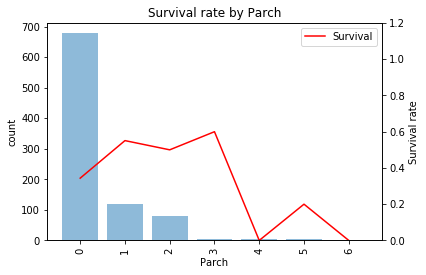

In [22]:
feature = 'Parch'
plot_survival_rate(feature, titanic_all)

In [23]:
# 3以上は3に丸める
titanic_all['Parch_rounded'] = titanic_all['Parch'].apply(lambda x: min(3, x))

              Survived  count
Parch_rounded                
0                34.4%    678
1                55.1%    118
2                50.0%     80
3                26.7%     15


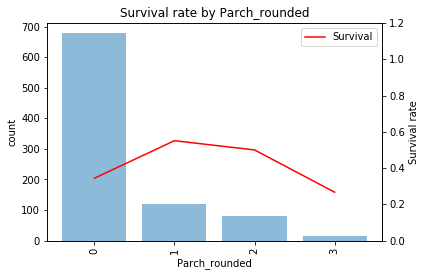

In [24]:
feature = 'Parch_rounded'
plot_survival_rate(feature, titanic_all)

# 運賃(Fare)
* 運賃が上がると生存率も上がる傾向

          Survived  count
Fare                     
00_0-8       14.1%     92
01_8-8       29.9%     87
02_8-8       17.9%    106
03_8-10      23.1%     78
04_10-14     42.9%     84
05_14-22     42.0%     88
06_22-27     51.7%     87
07_27-42     38.1%     97
08_42-78     52.9%     85
09_78-512    75.9%     87


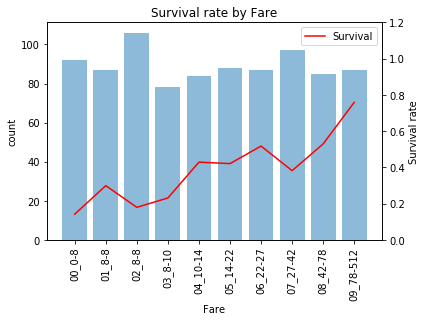

In [25]:
feature = 'Fare'
plot_survival_rate(feature, titanic_all)

# 乗船港(Embarked)
* 生存に乗船港は関係なさそうだがC(55.4%) > Q(39.0%) > S(33.7%)の順

         Survived  count
Embarked                
C           55.4%    168
NaN        100.0%      2
Q           39.0%     77
S           33.7%    644


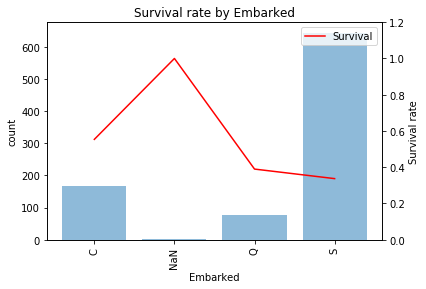

In [26]:
feature = 'Embarked'
plot_survival_rate(feature, titanic_all)

# 乗船港 x Pclass
* 乗船港 <-> 所得水準 <-> Passenger classといった関係があるのか？
  * Cの半数以上(52.2%)は1st
  * Qの9割以上が3rd
  * Qは3rdが多い割に生存率が高い
  * 乗船港によって客室の位置が違っておりそれが生存率に影響している？

In [27]:
cross_df = pd.crosstab(titanic_all['Pclass_name'], titanic_all['Embarked'])
print(cross_df.to_string())
print()

cross_df = pd.crosstab(titanic_all['Pclass_name'], titanic_all['Embarked'], normalize='columns')
print(cross_df.to_string(float_format='%.3f'))

Embarked       C    Q    S
Pclass_name               
1st          141    3  177
2nd           28    7  242
3rd          101  113  495

Embarked        C     Q     S
Pclass_name                  
1st         0.522 0.024 0.194
2nd         0.104 0.057 0.265
3rd         0.374 0.919 0.542


[Text(0, 0, 'C'), Text(0, 0, 'Q'), Text(0, 0, 'S')]

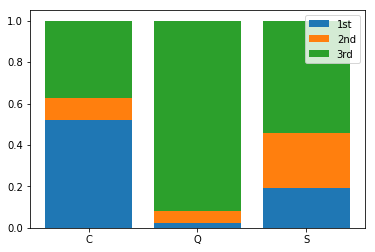

In [28]:
# 100%積み上げ棒グラフ
fig, ax = plt.subplots()
data_points = np.arange(len(cross_df.columns))

# 一番下の層のbarplot
ax.bar(data_points, cross_df.iloc[0])

# 二番目以降のbarplot。bottomに1番目の層の値を指定している。
ax.bar(data_points, cross_df.iloc[1], bottom=cross_df.iloc[0])
ax.bar(data_points, cross_df.iloc[2], bottom=cross_df.iloc[0]+cross_df.iloc[1])

ax.legend(cross_df.index)

ax.set_xticks(data_points)
ax.set_xticklabels(cross_df.columns)

In [29]:
titanic_all.groupby('Embarked').count()['PassengerId']

Embarked
C    270
Q    123
S    914
Name: PassengerId, dtype: int64

## 欠損値
* 欠損値が2件(100%)ある
  * 2人ともPclassが1stなので条件付き確率からSで補完する

In [30]:
f = titanic_all['Embarked'].isnull()
titanic_all[f]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Type,Pclass_name,IsAgeEstimated,SibSp_rounded,Parch_rounded
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,train,1st,0,0,0
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,train,1st,0,0,0


In [31]:
# チケットクラス = 1stの下での乗船港の条件付き確率
p_s = 914 / 1307
p_c = 270 / 1307
p_q = 123 / 1307

p_1st = (107+216) / 1307

p_1st_s = 0.194
p_1st_c = 0.522
p_1st_q = 0.024

p_s_1st = p_1st_s * p_s / p_1st
p_c_1st = p_1st_c * p_c / p_1st
p_q_1st = p_1st_q * p_q / p_1st

print('P(S|1st)={:.3f}, P(C|1st)={:.3f}, P(Q|1st)={:.3f}'.format(p_s_1st, p_c_1st, p_q_1st))

P(S|1st)=0.549, P(C|1st)=0.436, P(Q|1st)=0.009
